In [1]:
import numpy as np
import matplotlib
#matplotlib.use('WebAgg')
#matplotlib.use('Qt4Cairo')
#matplotlib.use('Qt5Cairo')
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

In [2]:

datax=np.random.normal(0.3,0.05,100)
datay=np.random.normal(0.3,0.05,100)

datax=np.append(datax,np.random.normal(0.3,0.02,25))
datay=np.append(datay,np.random.normal(0.8,0.02,25))

datax=np.append(datax,np.random.normal(0.8,0.05,100))
datay=np.append(datay,np.random.normal(0.8,0.15,100))


In [3]:
def dist(r1,r2):
    return np.sqrt( (r1[0]-r2[0])**2 + (r1[1]-r2[1])**2 )


def cluster_avg(clustx,clusty):
    if clustx==[] or clusty==[]:
        return [np.random.rand(),np.random.rand()]
    else:
        return [np.mean(clustx),np.mean(clusty)]
    

In [4]:
_k=3
#centerx=np.random.rand(_k)*0.1
#centery=np.random.rand(_k)*0.3
centerx=[0.3,0.3,0.3]
centery=[0.3,0.4,0.1]


ldata=len(datax)


all_centersx=[[centerx[i]] for i in np.arange(_k)] 
all_centersy=[[centery[i]] for i in np.arange(_k)] 


_iter=0
while _iter<=500:
    clustersx=[[] for i in np.arange(_k)] 
    clustersy=[[] for i in np.arange(_k)] 
    for i in np.arange(ldata):
        #calculate distances
        _tmp= np.array( [dist( [centerx[c] , centery[c] ] , [ datax[i],datay[i] ] ) for c in np.arange( _k ) ] ) 

        #find the number of the closest centroid
        _min=_tmp.argmin() 
        #make clusters
        clustersx[_min].append( datax[i] )
        clustersy[_min].append( datay[i] )    
  
        

    for i in np.arange(_k):
        _tmp=cluster_avg(clustersx[i],clustersy[i])
        centerx[i]=_tmp[0]
        centery[i]=_tmp[1]
        all_centersx[i].append(_tmp[0])
        all_centersy[i].append(_tmp[1])
        
        
    _iter+=1

<IPython.core.display.Javascript object>


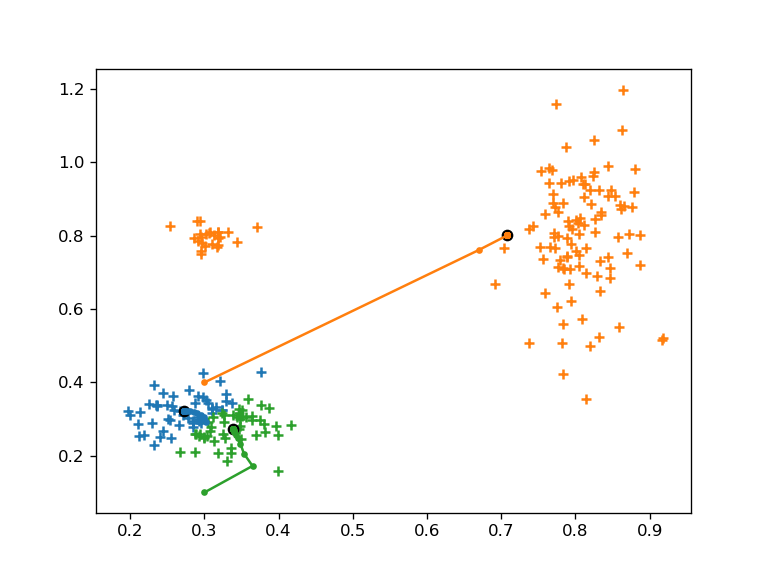

In [5]:
for i in np.arange(_k):
    plt.scatter(clustersx[i],clustersy[i],marker='+')#plot the data
    plt.plot(all_centersx[i],all_centersy[i],'.-' )#plot the movement of the centroids

        
    
plt.scatter(centerx,centery,marker='o',color='black')#plot the centroids



plt.show()